In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [65]:
data=pd.read_csv("Train.csv")

In [7]:
data.shape

(8523, 12)

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

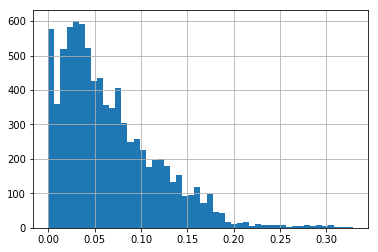

In [15]:
data['Item_Visibility'].hist(bins=50)

In [16]:
Item_Visibility_log=np.log(data['Item_Visibility']+0.1)

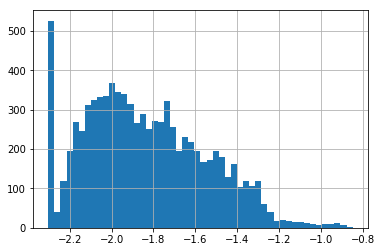

In [17]:
Item_Visibility_log.hist(bins=50)

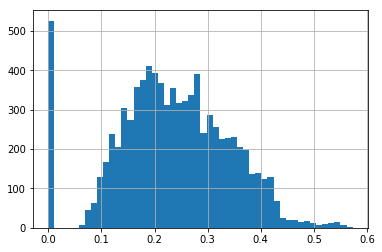

In [18]:
Item_Visibility_sqrt=np.sqrt(data['Item_Visibility'])
Item_Visibility_sqrt.hist(bins=50)

### Feature Scaling

In [21]:
data[['Item_Visibility','Item_MRP']].head(10)

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614
5,0.000000,51.4008
6,0.012741,57.6588
7,0.127470,107.7622
8,0.016687,96.9726
9,0.094450,187.8214


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data[['Item_Visibility','Item_MRP']])
scaled_data=pd.DataFrame(scaled_data,columns=['Item_Visibility','Item_MRP'])
scaled_data.head(10)

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805
5,0.000000,0.085361
6,0.038799,0.111923
7,0.388165,0.324587
8,0.050815,0.278791
9,0.287613,0.664399


In [26]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8523.000000,8523.000000
mean,0.201382,0.465635
std,0.157123,0.264327
min,0.000000,0.000000
25%,0.082187,0.265437
50%,0.164228,0.474209
75%,0.288026,0.655156
max,1.000000,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data[['Item_Visibility','Item_MRP']])
scaled_data=pd.DataFrame(scaled_data,columns=['Item_Visibility','Item_MRP'])
scaled_data.head(10)

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220
5,-1.281758,-1.438734
6,-1.034813,-1.338238
7,1.188838,-0.533641
8,-0.958331,-0.706908
9,0.548845,0.752008


In [30]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8.523000e+03,8.523000e+03
mean,1.822365e-16,-1.637654e-16
std,1.000059e+00,1.000059e+00
min,-1.281758e+00,-1.761688e+00
25%,-7.586531e-01,-7.574307e-01
50%,-2.364792e-01,3.243893e-02
75%,5.514755e-01,7.170372e-01
max,5.083050e+00,2.021724e+00


In [31]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### one Hot Encoding

In [34]:
data['Outlet_Type'].isnull().sum()

0

In [36]:
data['Outlet_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [37]:
pd.get_dummies(data['Outlet_Type']).head(10)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


### Label Encoding

In [38]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()
outlet_size_le=data['Outlet_Size'].map(
{
    'Small':0,
    'Medium':1,
    'High':2,
    null:-1
})

In [45]:
outlet_size_le.value_counts()

 1    2793
-1    2410
 0    2388
 2     932
Name: Outlet_Size, dtype: int64

### Combine Sparse Class

In [47]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [66]:
data['Item_Identifier'].value_counts().head()

FDW13    10
FDG33    10
NCF42     9
FDF52     9
FDQ40     9
Name: Item_Identifier, dtype: int64

In [67]:
temp=data['Item_Identifier'].value_counts()

In [68]:
data['Item_Identifier_count']=data['Item_Identifier'].apply(lambda x:temp[x])
data[['Item_Identifier_count','Item_Identifier']].head()

,Item_Identifier_count,Item_Identifier
0,8,FDA15
1,6,DRC01
2,7,FDN15
3,6,FDX07
4,6,NCD19


In [69]:
for i in range(0,len(data)):
    if(data['Item_Identifier_count'][i]<4):
        data['Item_Identifier'][i]='Other'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
data['Item_Identifier'].value_counts()

Other    418
FDG33     10
FDW13     10
FDU12      9
FDT07      9
FDW26      9
FDP25      9
FDG09      9
FDW49      9
NCI54      9
NCL31      9
FDX04      9
NCY18      9
DRN47      9
FDV60      9
FDF56      9
NCQ06      9
NCJ30      9
FDO19      9
NCF42      9
FDX31      9
FDF52      9
FDD38      9
FDV38      9
DRE49      9
FDX20      9
NCB18      9
FDQ40      9
FDO52      8
FDX45      8
        ... 
FDX14      4
FDU52      4
FDH08      4
NCR06      4
FDW33      4
NCW18      4
DRO35      4
FDW36      4
DRM35      4
FDE47      4
FDQ27      4
FDQ55      4
NCO07      4
DRJ25      4
FDM34      4
FDL27      4
FDH04      4
FDE57      4
FDI12      4
FDS09      4
NCA54      4
FDB46      4
FDJ28      4
DRP47      4
FDX02      4
FDQ19      4
FDR45      4
FDX10      4
NCT05      4
NCC19      4
Name: Item_Identifier, Length: 1403, dtype: int64

In [72]:
data['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [75]:
import datetime
curryear = datetime.datetime.today().year

In [76]:
data['Outlet_Establishment_Since']=curryear-data['Outlet_Establishment_Year']

In [77]:
data[['Outlet_Establishment_Year','Outlet_Establishment_Since']]

,Outlet_Establishment_Year,Outlet_Establishment_Since
0,1999,21
1,2009,11
2,1999,21
3,1998,22
4,1987,33
5,2009,11
6,1987,33
7,1985,35
8,2002,18
9,2007,13


In [78]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_count',
       'Outlet_Establishment_Since'],
      dtype='object')

In [80]:
temp=data['Item_Type'].value_counts()

In [82]:
data['Item_Type_count']=data['Item_Type'].apply(lambda x:temp[x])
data[['Item_Type','Item_Type_count']].head()


,Item_Type,Item_Type_count
0,Dairy,682
1,Soft Drinks,445
2,Meat,425
3,Fruits and Vegetables,1232
4,Household,910


In [84]:
data.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

## Automate Feature Engineering